Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe named "data" from the given datafile and print it's head

In [2]:
#read data into a Data frame
data=pd.read_csv(r'Advertising.csv', index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

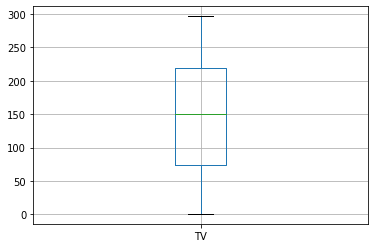

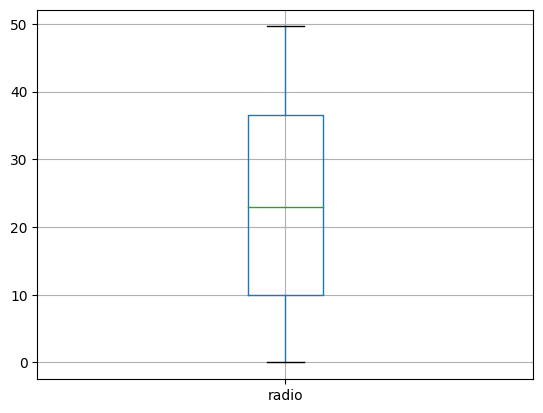

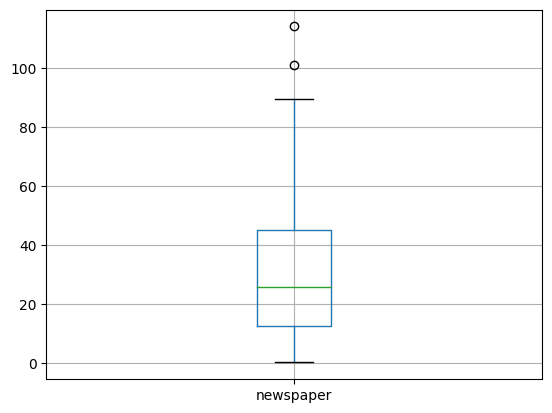

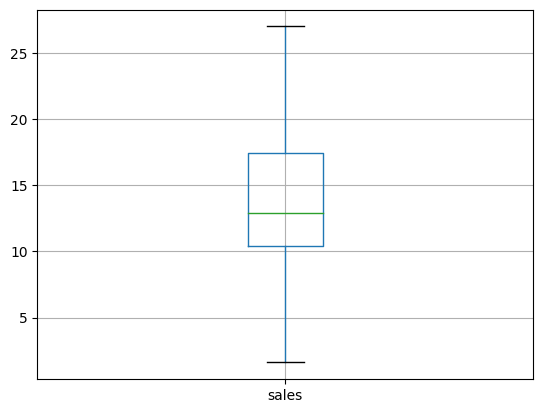

In [5]:
# Assumption 1: There should be no outlitre in the data.
#check using boxplot.
for i in data.columns: #tv,radio,newspaper,sales
    data.boxplot(column=i)# (tv=tv)(radio=radio)(newspaper=newspaper)(sales=sales)
    plt.show()
    #trit the outlier or live as it is.

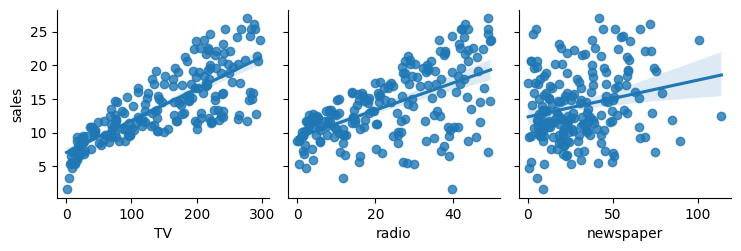

In [6]:
#Assumption 2:Assumption of linearity:Every ind var should have a linear relationship with the dep var

sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars="sales",kind='reg')

In [7]:
#data.drop(["newspaper"],axis=1,inplace=True)
#linerati assumati is not maint /no lierated made

In [8]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
# create X and Y
X= data[['TV', 'radio', 'newspaper']]
Y=data['sales']
#x=data.iloc[:0:-1]

In [10]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [11]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='sales', ylabel='Density'>

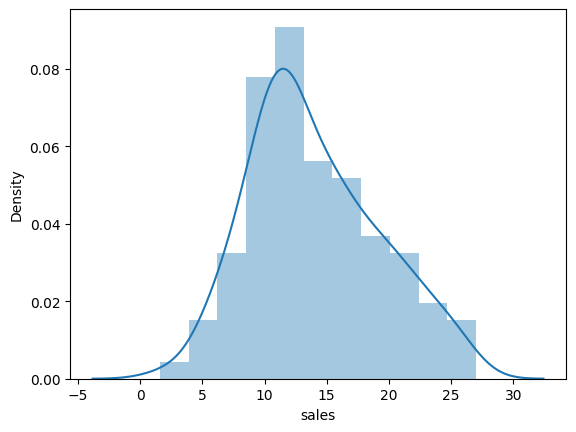

In [12]:
# Assumption of NOrmality:the dependent variable should follow an 
#approximat normal distrbution
sns.distplot(Y)

In [13]:
"""

Log transformation
import numpy as np
Y_log = np.log(Y)
"""
#less skneedis beter than highed skeed data

'\n\nLog transformation\nimport numpy as np\nY_log = np.log(Y)\n'

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

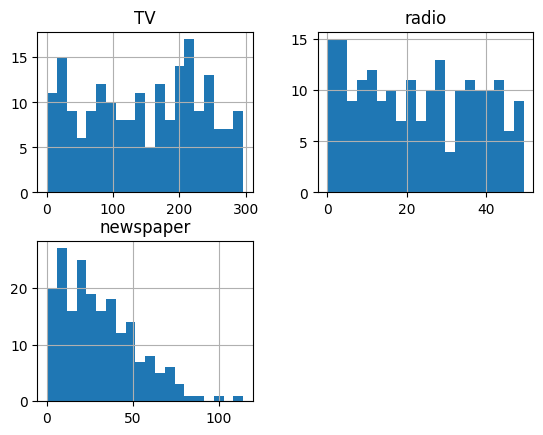

In [14]:
X.hist(bins=20)

In [15]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#note :-
#        use (log1p)in case when the value is infinte after conversion

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

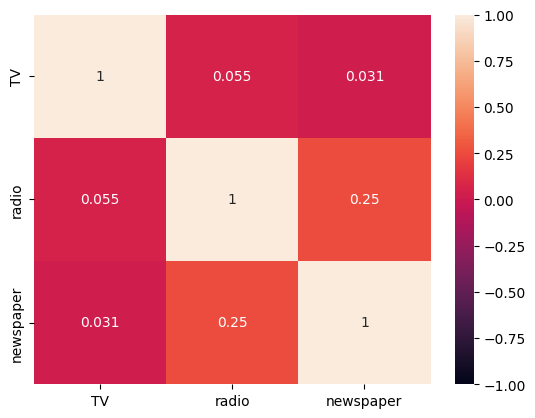

In [16]:
#Assumption of no multicollineraity : There should be no multicollinearity
#between the independent variables
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [18]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [20]:
from sklearn.linear_model import LinearRegression
#create a model aobject
lm = LinearRegression()
#train  the model object
lm.fit(X_train,Y_train)
 
print(lm.intercept_)
print(lm.coef_)

3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]


In [21]:
# pair the feature
print(list(zip(X.columns, lm.coef_)))


[('TV', 0.04374250157742166), ('radio', 0.1930370789734531), ('newspaper', -0.048951368222487836)]


In [22]:
x1=100
x2=100
x3=np.log1p(100)
Y_pred=3.3532913858151474+(0.0437425*x1)+(0.19303708*x2)+(-0.04895137*x3)
print(Y_pred)

26.805332913800658


In [23]:
# predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


Note:-

In [24]:
lm.score(X_train, Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.9208986647500219

In [25]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [26]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squred=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squred)

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [27]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


<AxesSubplot:xlabel='sales'>

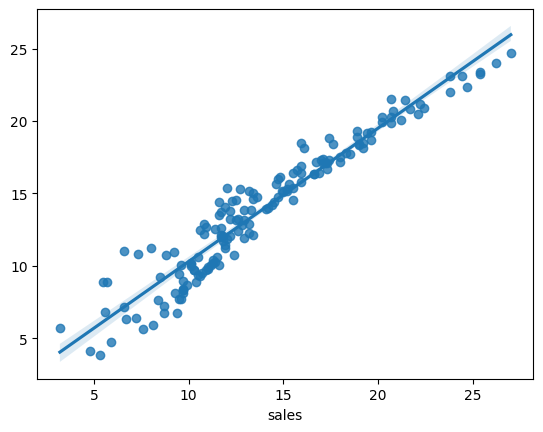

In [28]:
sns.regplot(x=Y_train,y=lm.predict(X_train),ci=95)

In [29]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [30]:
from sklearn.linear_model import Ridge
#create a model aobject
lm = Ridge()
#train  the model object
lm.fit(X_train,Y_train)
 
print(lm.intercept_)
print(lm.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [31]:
Y_pred=lm.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squred=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squred)

R-squared: 0.8348082644975934
RMSE: 2.592920462683998
Adj R-square: 0.832279819566434


In [33]:
from sklearn.linear_model import Lasso
#create a model aobject
lm = Lasso()
#train  the model object
lm.fit(X_train,Y_train)
 
print(lm.intercept_)
print(lm.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squred=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squred)

R-squared: 0.8348082644975934
RMSE: 2.592920462683998
Adj R-square: 0.832279819566434


OLS==> OLS(Y_train,X_train)

ols==>ols(Y~X1+X2+X3)

fit(X_train, Y_train)-->sklearn

Y~X1+X2+X3,data=df-->statsmodels

In [35]:
new_df=pd.DataFrame()
new_df=X_train.copy()

new_df["sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [36]:
import statsmodels .formula.api as sm
# create a fitted model with all three features
lm_model=sm.ols(formula='sales~TV + radio + newspaper',data=new_df).fit()
#print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.10e-85
Time:                        17:23:00   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [37]:
Y_pred_new=lm_model.predict(X_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squred=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squred)

0.8348010719035377
2.5929769110930154
0.832272516881653


In [39]:
import statsmodels .formula.api as sm

# create a fitted model with all three features
lm_model=sm.ols(formula='sales~TV + radio ',data=new_df).fit()

#print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           3.47e-87
Time:                        17:23:01   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [40]:
Y_pred_new=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squred=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squred)

0.8354496662944217
2.5878817077378105
0.8329310387377037


Text(0, 0.5, 'Residuals')

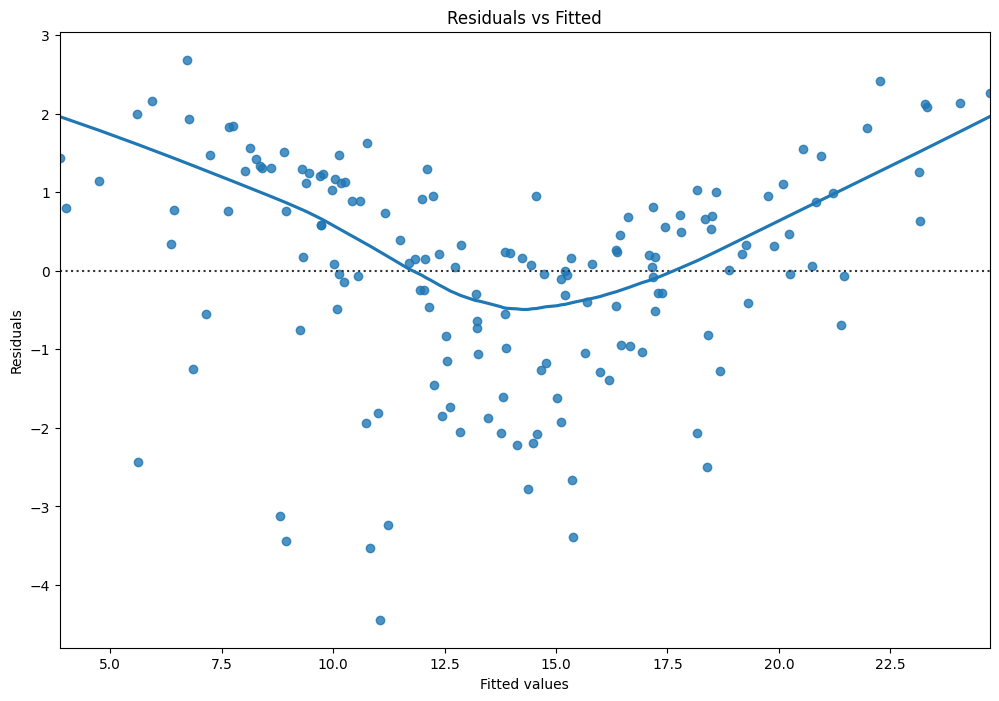

In [41]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [42]:
# the line should be randome and should not have repreted pattern 

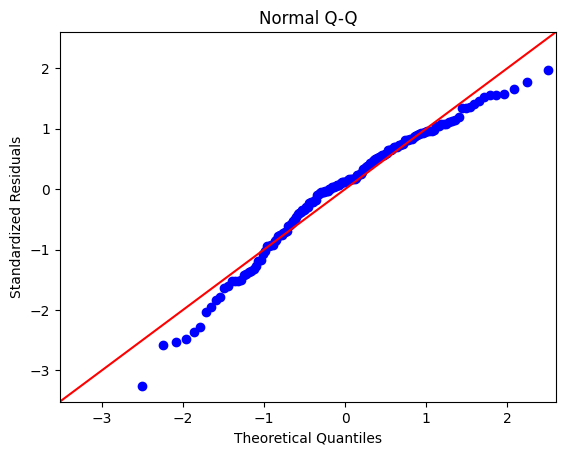

In [43]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 



the error should follow red dignoile line

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

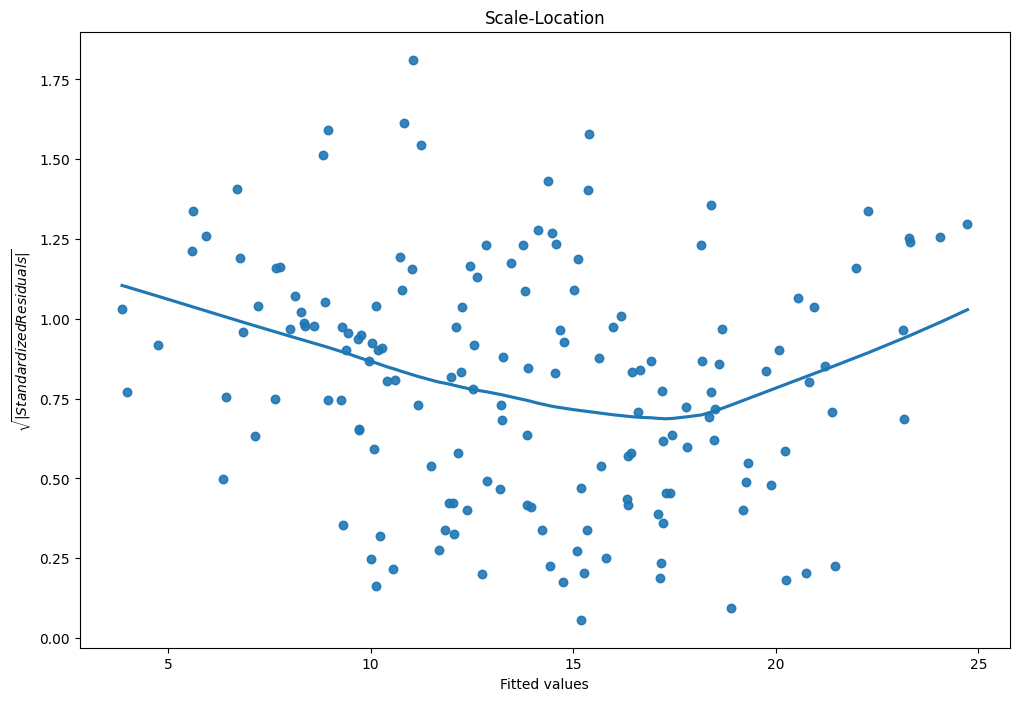

In [44]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

an approsment lin as we wont or there should be not stive angle in the line

# Standardization Scaler

In [52]:
#pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)

In [53]:
#create x and Y
X = data[['TV','radio','newspaper']]
Y = data['sales']

In [54]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit(x)
#X=scaler.tranform(X)
print(X)

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]
 [-1.61540845  1.73103399  2.04592999]
 [-1.04557682  0.64390467 -0.32470841]
 [-0.31343659 -0.24740632 -0.87248699]
 [-1.61657614 -1.42906863 -1.36042422]
 [ 0.61604287 -1.39530685 -0.43058158]
 [-0.94515567 -1.17923146 -0.29248614]
 [ 0.79002835  0.04969734 -1.22232878]
 [-1.4390876   0.79920886  1.62704048]
 [-0.57850171 -1.05768905 -1.07502697]
 [ 0.66625345  0.65065703  0.71100739]
 [ 0.56466461  1.65000572  1.02862691]
 [-0.92530498  0.9004942   3.84117072]
 [ 1.56887609  1.10306488  1.16211917]
 [-0.90895735 -0.18663512 -0.56407384]
 [ 0.0030068   0.04294498 -0.52724839]
 [ 0.8332328   0.29953451  1.05164281]
 [ 1.05509347 -1.22649795 -0.32470841]
 [-1.5628625  -0.4972435   0.87672192]
 [ 0.94883389 -0.42971994 -0.20042252]
 [-0.98952781 -0.72007125 -0.56407384]
 [ 1.35285385 -1.33453565

In [55]:
from sklearn.model_selection import train_test_split

#Split the data into the and trina
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [56]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


# Gradient descent

In [70]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.01,  #alpha 'eta ; is the argument or parameter'
                  shuffle=True, # it should shuffle for equal number
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs is 1000
                  early_stopping=True, 
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[14.12339593]
[ 3.81092365  2.80450708 -0.04411337]


In [69]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squred=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squred)

0.8385034893701074
2.5637555216282193
0.8360316040033233


In [74]:
pd.set_option('display.float_format','{:.4f}'.format)

In [75]:
lm.n_iter_

7

In [77]:
lm.t_

1121.0